# Prediction using Supervised ML(Beginner)


## Problem Statement

### We have to Predict percentage of marks of an student based on number of study hours.

#### Our Approach :

As this task involves only two variables, We can use simple linear regression and therefore can make use of Python scikit-learn library for the same

### Author: Atul Raj

### (1) Importing all the required libraries :

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import requests

import io

### (2) Importing Dataset and Vizualizing Data

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


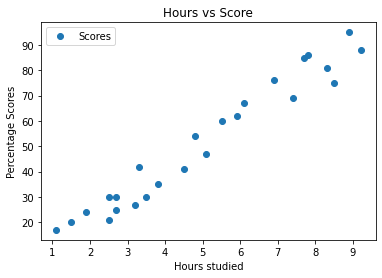

In [3]:
# plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Score')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Scores')
plt.show()

From the graph we can clearly see there is positive linear relation between number of hours studied and percentage of marks obtained.

### (3) Preparing the data
#### The next step is to divide the data into "attributes" (inputs) and "labels" (output) and splitting the data into training and test sets.

In [4]:
# Using scikit-learn inbuilt train_test_split method.
train,test=train_test_split(df, test_size = 0.25,random_state=123)

train_x=train.drop("Scores",axis=1)
train_y=train["Scores"]

test_x=test.drop("Scores",axis=1)
test_y=test["Scores"]


### (4) Training the Algorithm
#### We have split our data into training and testing sets and now we will train the algorithm.

In [5]:
lr=LinearRegression()
lr.fit(train_x, train_y)

print('Training Complete')

Training Complete


In [6]:
lr.coef_

array([9.61718609])

In [7]:
lr.intercept_

2.448617866650636

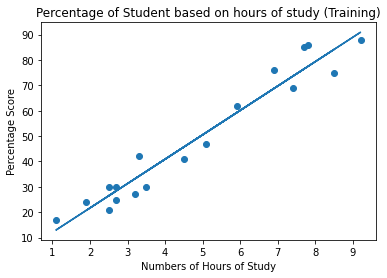

In [8]:
# Plotting the regression line(y = a + bX)
line = lr.coef_*train_x+lr.intercept_

# Plotting for the training data
plt.scatter(train_x, train_y)
plt.plot(train_x,line)
plt.title("Percentage of Student based on hours of study (Training)")
plt.xlabel("Numbers of Hours of Study")
plt.ylabel("Percentage Score")
plt.show()

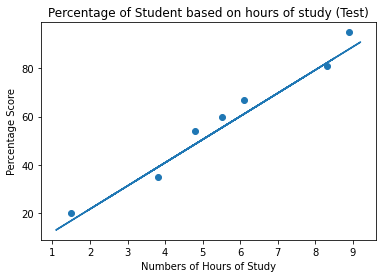

In [9]:
# Plotting for the test data
plt.scatter(test_x, test_y)
plt.plot(train_x,line)
plt.title("Percentage of Student based on hours of study (Test)")
plt.xlabel("Numbers of Hours of Study")
plt.ylabel("Percentage Score")
plt.show()

### (5) Making Predictions

In [10]:
print(test_x) # Testing data in-Hours
y_pred = lr.predict(test_x) # Predicting the Scores

    Hours
5     1.5
21    4.8
22    3.8
18    6.1
15    8.9
8     8.3
7     5.5


In [11]:
# Comparing Actual vs Predicted
dataf = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})

dataf

,Actual,Predicted
5,20,16.874397
21,54,48.611111
22,35,38.993925
18,67,61.113453
15,95,88.041574
8,81,82.271262
7,60,55.343141


In [12]:
# Using particular values
hours = [9.25]
own_pred=lr.predict([hours])
print("No of hour = {}".format([hours]))
print("Predicted Score = {}".format(own_pred[0]))

No of hour = [[9.25]]
Predicted Score = 91.407589223163


### (6) Evaluating the Model
#### The final step is to evaluate the performance of the algorithm.This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity we will use mean square error and R2 value.

In [13]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:',
     mean_squared_error(test_y, y_pred))

Mean Squared Error: 23.019217337139764


In [14]:
from sklearn.metrics import r2_score
print(r2_score(test_y, y_pred))

0.9593798023076978
